In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
os.chdir("/content/drive/MyDrive/ASDS/Data Visualization/Project")

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
print("Numerical Summary:\n")
df.describe()

Numerical Summary:



is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [6]:
print("Categorical Summary:\n")
df.describe(include="object")

Categorical Summary:



hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  
count        119390        119390             119390                  119390  
unique            3             4                  3                     926  
top      No Deposit     Transient          Check-Out              2015-10-21  
freq         104641         89613              75166                    1461

In [7]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [8]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data[missing_data['Missing Values'] > 0])

          Missing Values  Percentage
children               4    0.003350
country              488    0.408744
agent              16340   13.686238
company           112593   94.306893


In [9]:
# Convert the 'arrival_date_month' column to a datetime format
# First, map month names to numbers
month_map = {
    'January': '01', 'February': '02', 'March': '03', 'April': '04', 'May': '05', 'June': '06',
    'July': '07', 'August': '08', 'September': '09', 'October': '10', 'November': '11', 'December': '12'
}

df['arrival_date_month'] = df['arrival_date_month'].map(month_map)

# Create a new 'arrival_date' column by combining year, month, and day columns

df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015                 07   
1  Resort Hotel            0        737               2015                 07   
2  Resort Hotel            0          7               2015                 07   
3  Resort Hotel            0         13               2015                 07   
4  Resort Hotel            0         14               2015                 07   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  agent  company  \
0                        0                     0       2  ...    NaN      NaN   
1                        0                     0       2  ...    NaN      NaN   
2                        0                     1       1  ...    NaN      NaN   
3                        0                     1       1  ...  304.0      NaN   
4                        0                     2       2  ...  240.0      NaN   

  days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                    0     Transient   0.0                           0   
1                    0     Transient   0.0                           0   
2                    0     Transient  75.0                           0   
3                    0     Transient  75.0                           0   
4                    0     Transient  98.0                           0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0           Check-Out               2015-07-01   
1                          0           Check-Out               2015-07-01   
2                          0           Check-Out               2015-07-02   
3                          0           Check-Out               2015-07-02   
4                          1           Check-Out               2015-07-03   

  arrival_date  
0   2015-07-01  
1   2015-07-01  
2   2015-07-01  
3   2015-07-01  
4   2015-07-01  

[5 rows x 33 columns]

In [10]:
df["arrival_date"]

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 119390, dtype: datetime64[ns]

In [11]:
# Drop unnecessary columns
df = df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1)

# Verify that the columns have been dropped and the 'arrival_date' column is present
df.head()

hotel  is_canceled  lead_time  arrival_date_week_number  \
0  Resort Hotel            0        342                        27   
1  Resort Hotel            0        737                        27   
2  Resort Hotel            0          7                        27   
3  Resort Hotel            0         13                        27   
4  Resort Hotel            0         14                        27   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal  ...  agent company days_in_waiting_list  customer_type   adr  \
0   BB  ...    NaN     NaN                    0      Transient   0.0   
1   BB  ...    NaN     NaN                    0      Transient   0.0   
2   BB  ...    NaN     NaN                    0      Transient  75.0   
3   BB  ...  304.0     NaN                    0      Transient  75.0   
4   BB  ...  240.0     NaN                    0      Transient  98.0   

   required_car_parking_spaces total_of_special_requests reservation_status  \
0                            0                         0          Check-Out   
1                            0                         0          Check-Out   
2                            0                         0          Check-Out   
3                            0                         0          Check-Out   
4                            0                         1          Check-Out   

   reservation_status_date arrival_date  
0               2015-07-01   2015-07-01  
1               2015-07-01   2015-07-01  
2               2015-07-02   2015-07-01  
3               2015-07-02   2015-07-01  
4               2015-07-03   2015-07-01  

[5 rows x 30 columns]

<Figure size 1000x500 with 0 Axes>

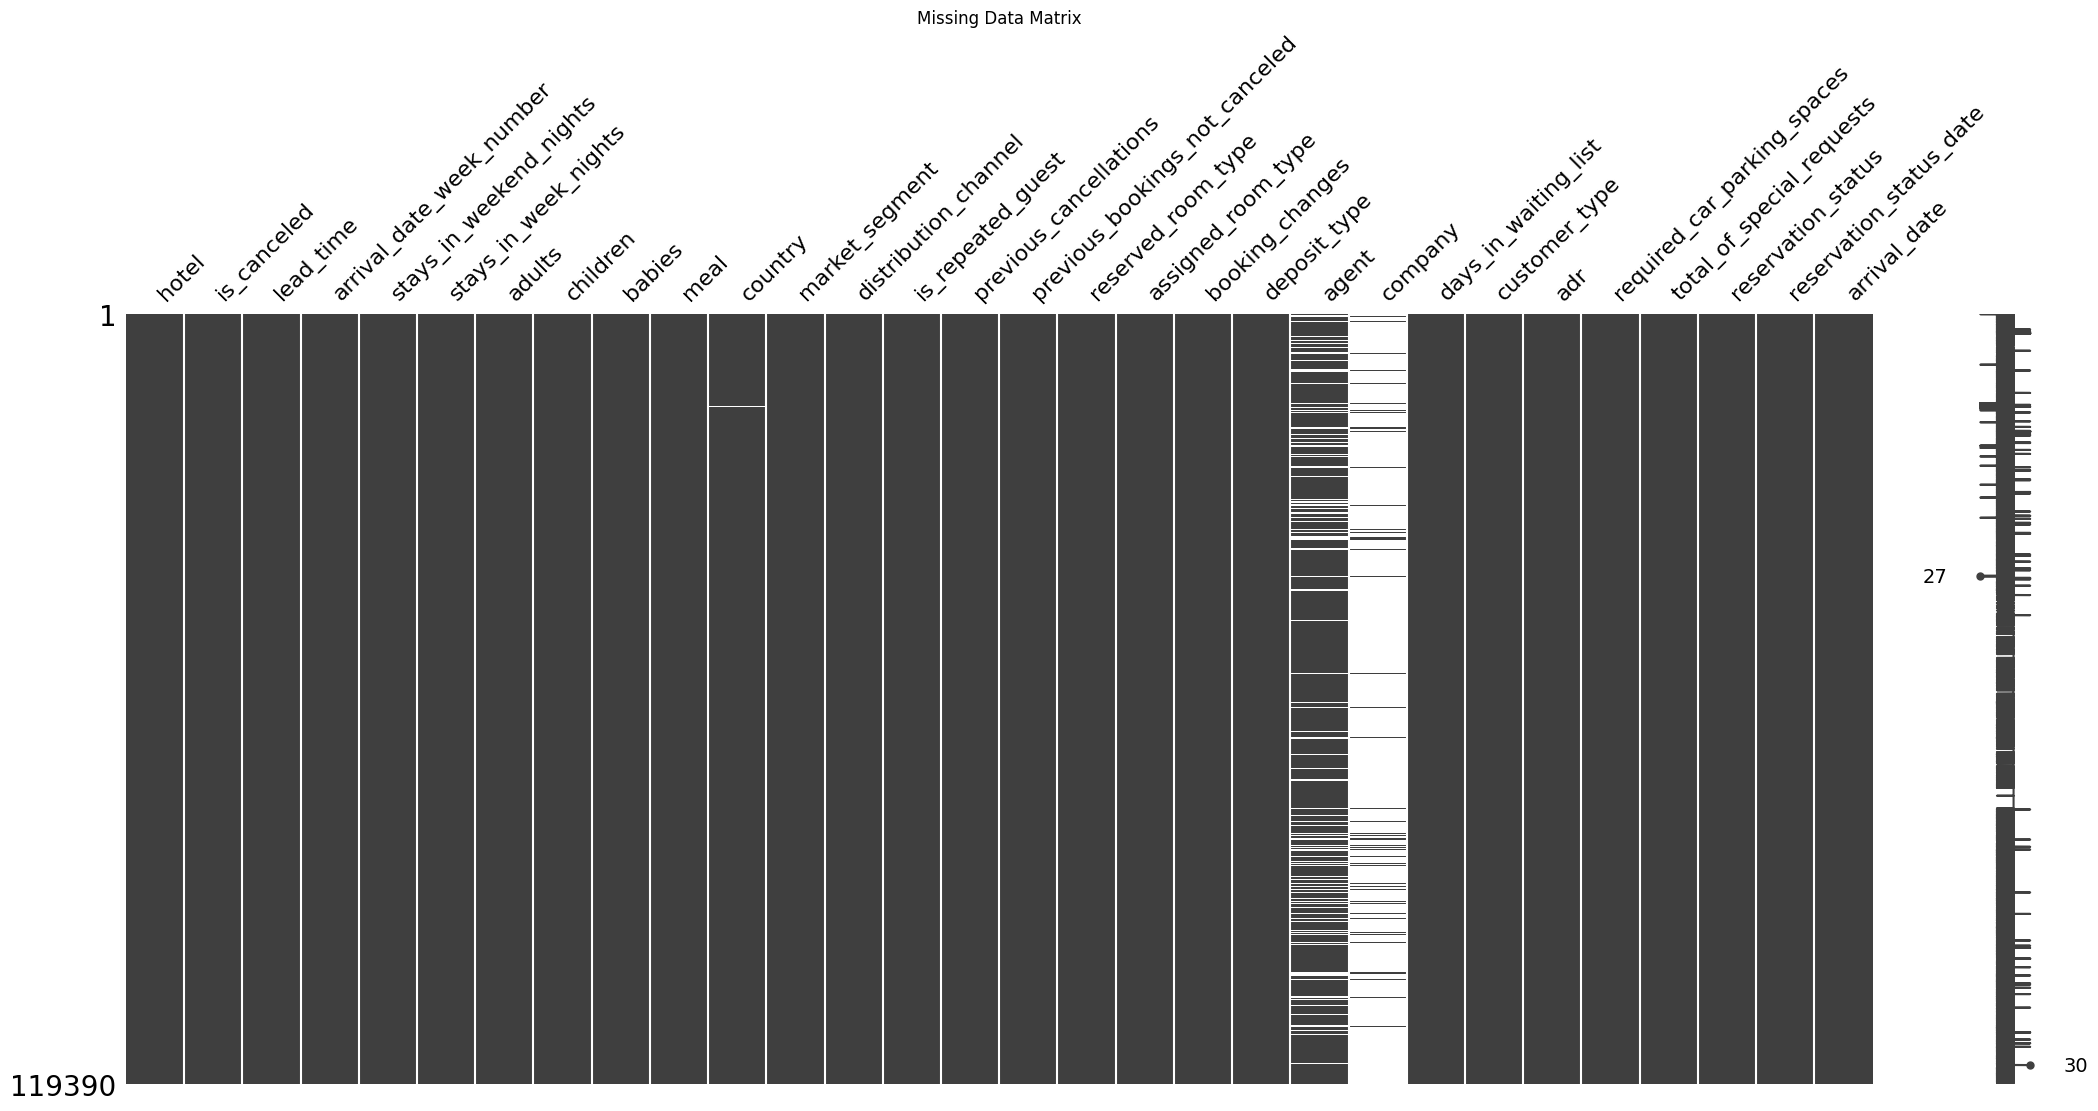

In [12]:
plt.figure(figsize=(10, 5))
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()


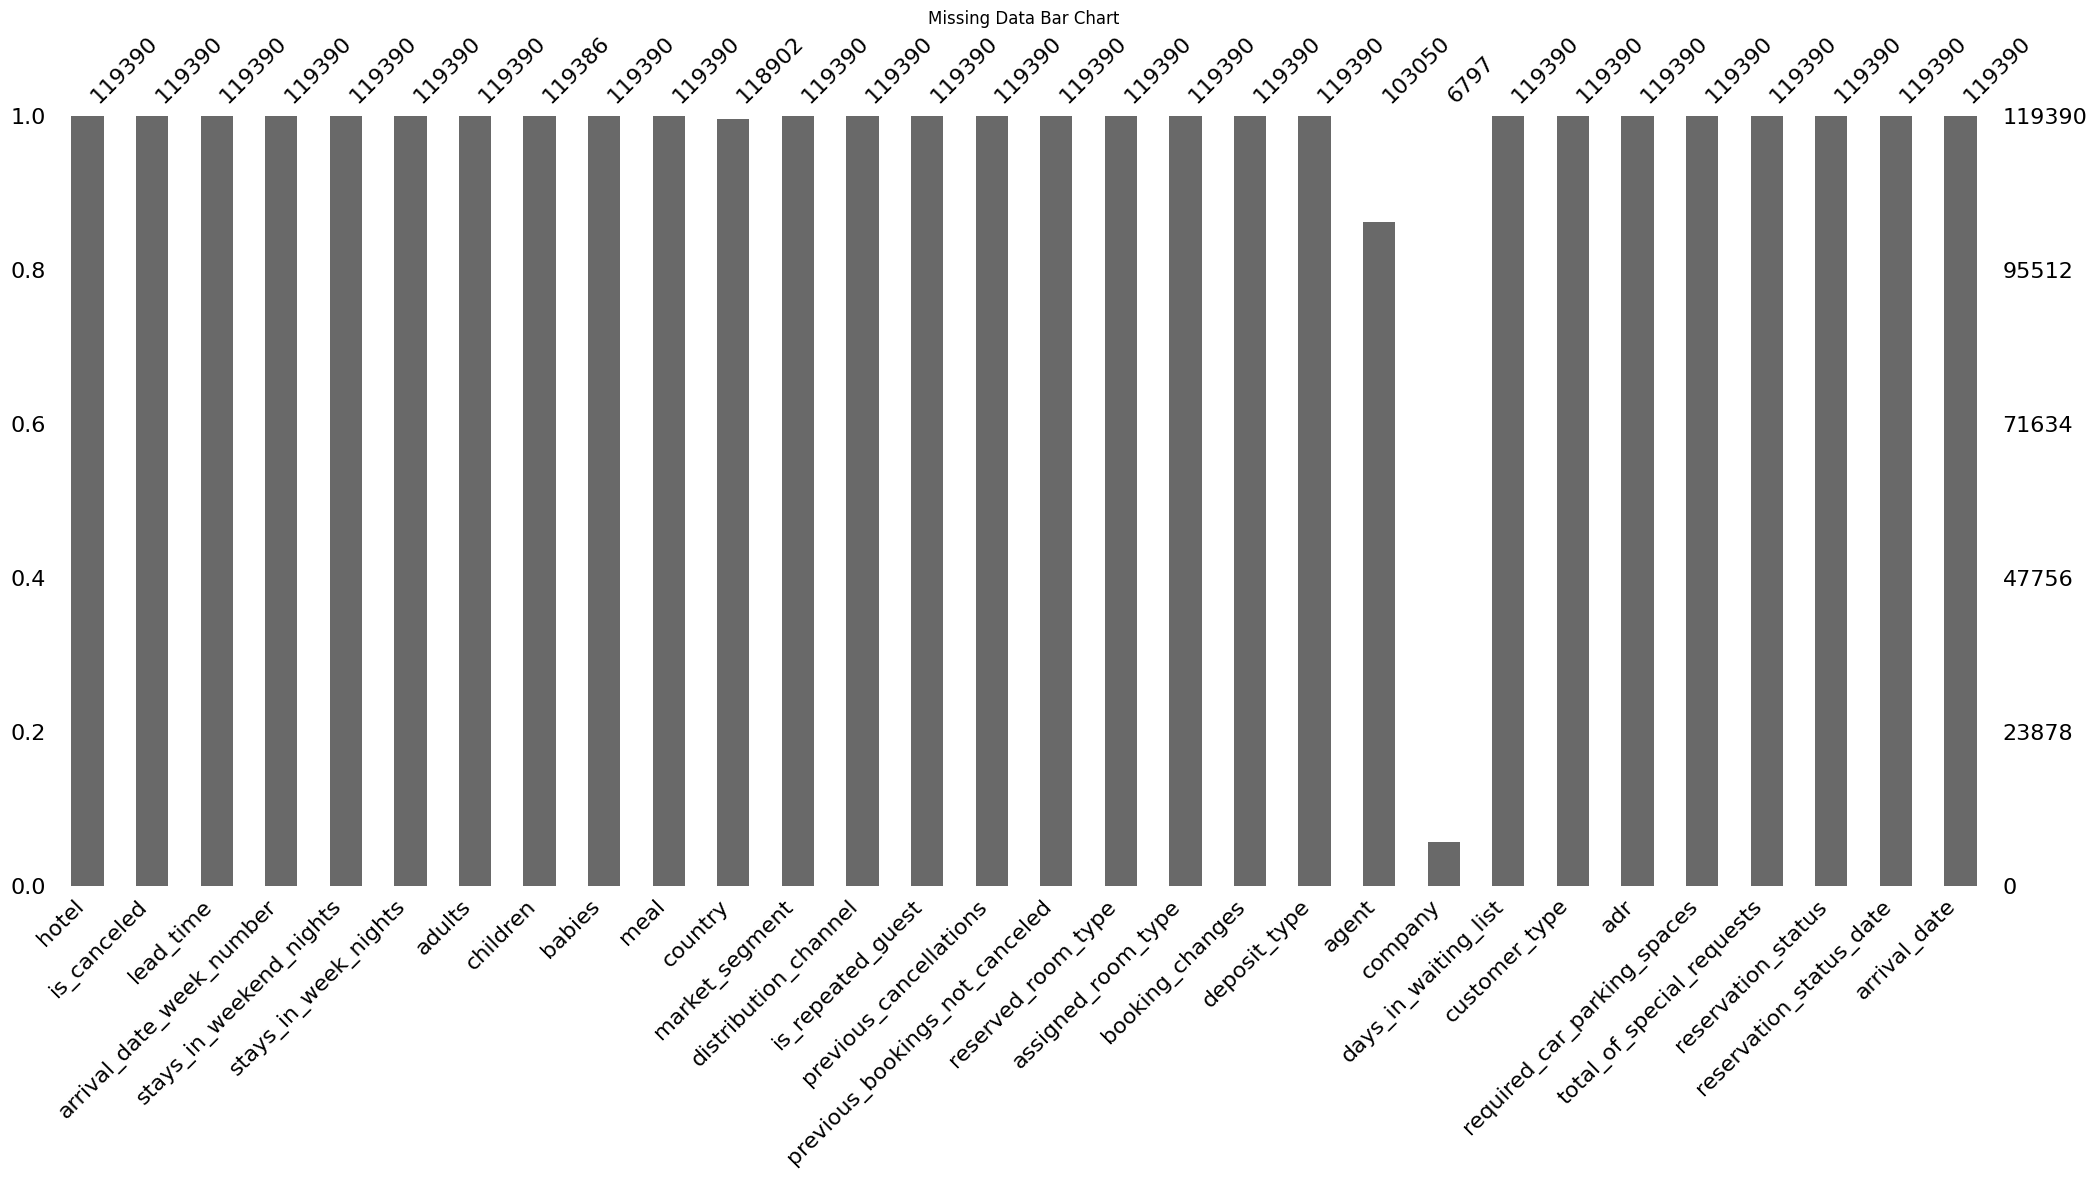

In [13]:
plt.figure(figsize=(10, 5))
msno.bar(df)
plt.title("Missing Data Bar Chart")
plt.show()

In [14]:
# 1. 'children' column: Replace NaNs with 0 (assuming missing means no children)
df['children'] = df['children'].fillna(0)

# 2. 'agent' column: Replace NaNs with a placeholder (e.g., 0, indicating no agent)
df['agent'] = df['agent'].fillna(0)

# 3. 'company' column: Replace NaNs with a placeholder (e.g., 0, indicating no company booking)
df['company'] = df['company'].fillna(0)

In [15]:
df = df[(df['stays_in_weekend_nights'] != 0) | (df['stays_in_week_nights'] != 0)]  # Remove rows with both nights as 0

In [16]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill NaNs with mode for each categorical column
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [17]:
print("\nMissing Values After Handling:")
print(df.isnull().sum().sum(), "missing values remaining")


Missing Values After Handling:
0 missing values remaining


<Figure size 1000x500 with 0 Axes>

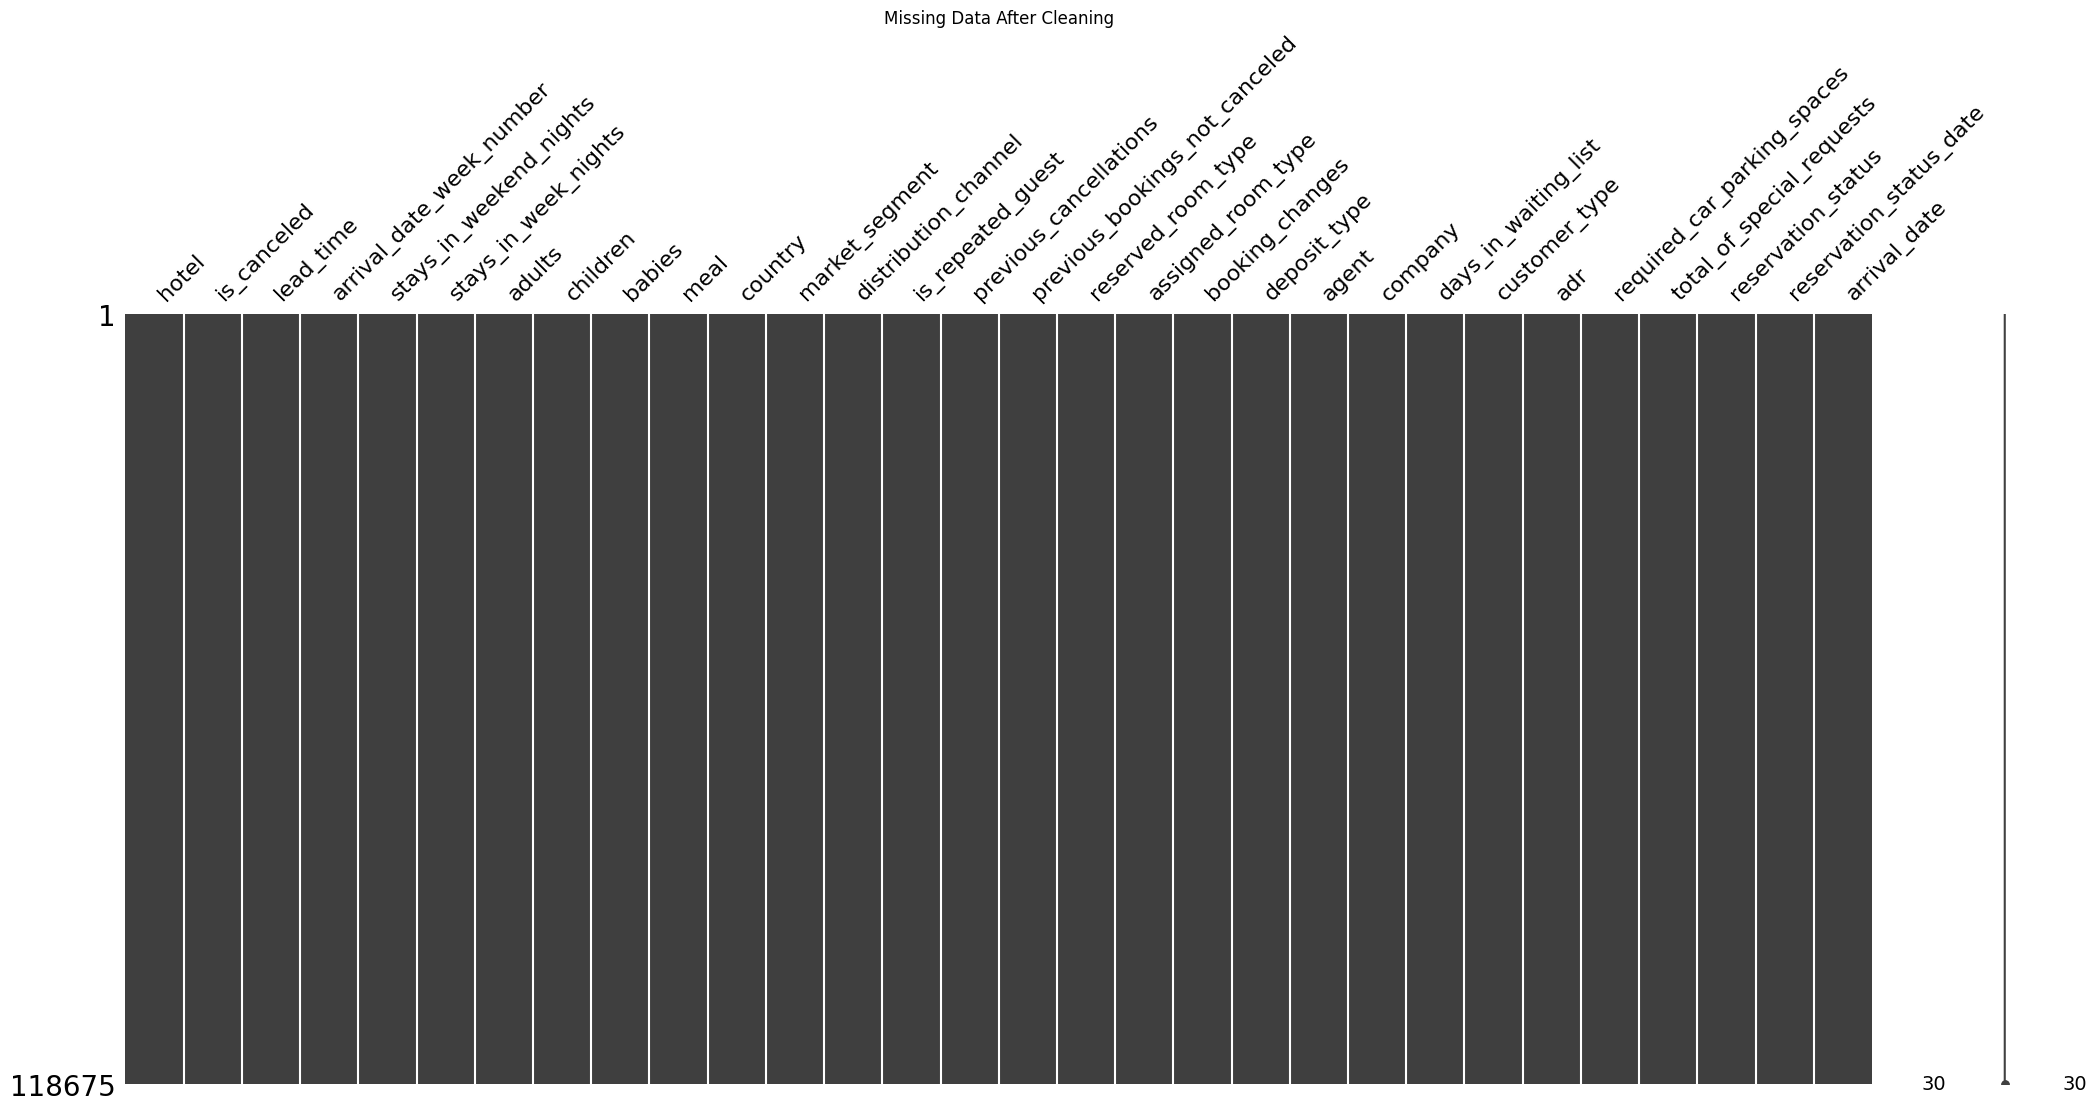

In [18]:
plt.figure(figsize=(10, 5))
msno.matrix(df)
plt.title("Missing Data After Cleaning")
plt.show()

In [19]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 31949


In [20]:
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicate rows have been dropped.")

# Confirm that duplicates are removed
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")

Duplicate rows have been dropped.
Number of duplicate rows after cleaning: 0


In [21]:
# Converting date columns to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86726 entries, 2 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86726 non-null  object        
 1   is_canceled                     86726 non-null  int64         
 2   lead_time                       86726 non-null  int64         
 3   arrival_date_week_number        86726 non-null  int64         
 4   stays_in_weekend_nights         86726 non-null  int64         
 5   stays_in_week_nights            86726 non-null  int64         
 6   adults                          86726 non-null  int64         
 7   children                        86726 non-null  float64       
 8   babies                          86726 non-null  int64         
 9   meal                            86726 non-null  object        
 10  country                         86726 non-null  object        
 11  market

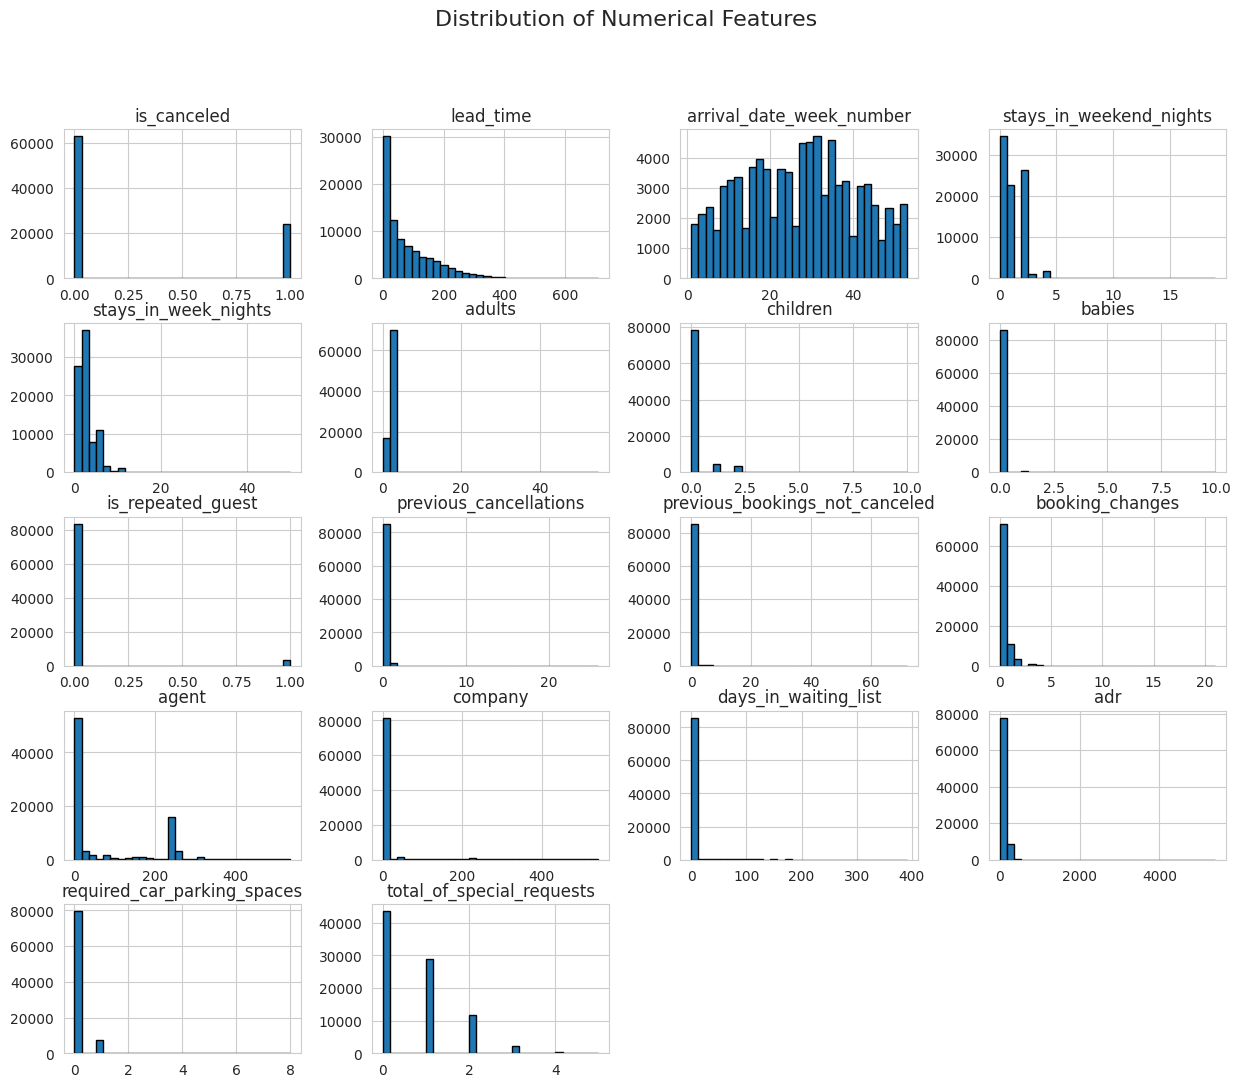

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for plots
sns.set_style("whitegrid")

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical features
df[numerical_cols].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


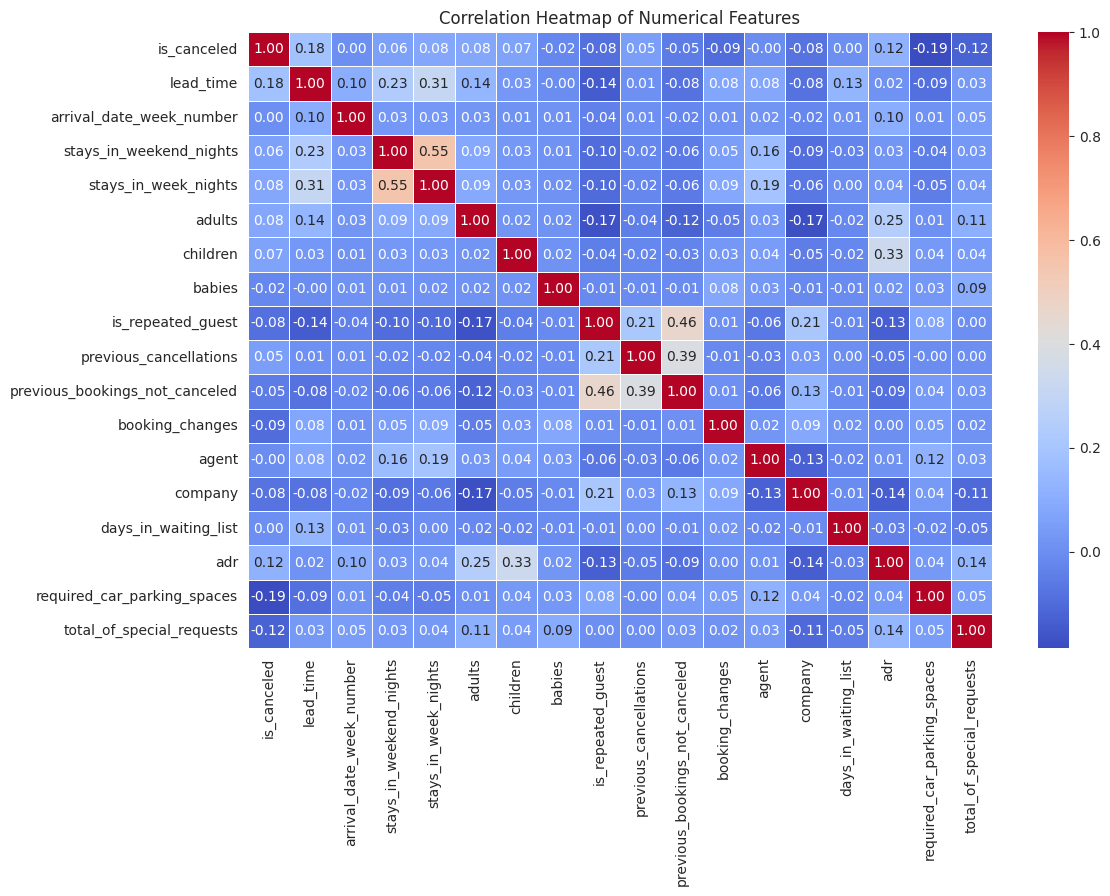

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5) # Changed this line to only include the numerical columns in the df
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

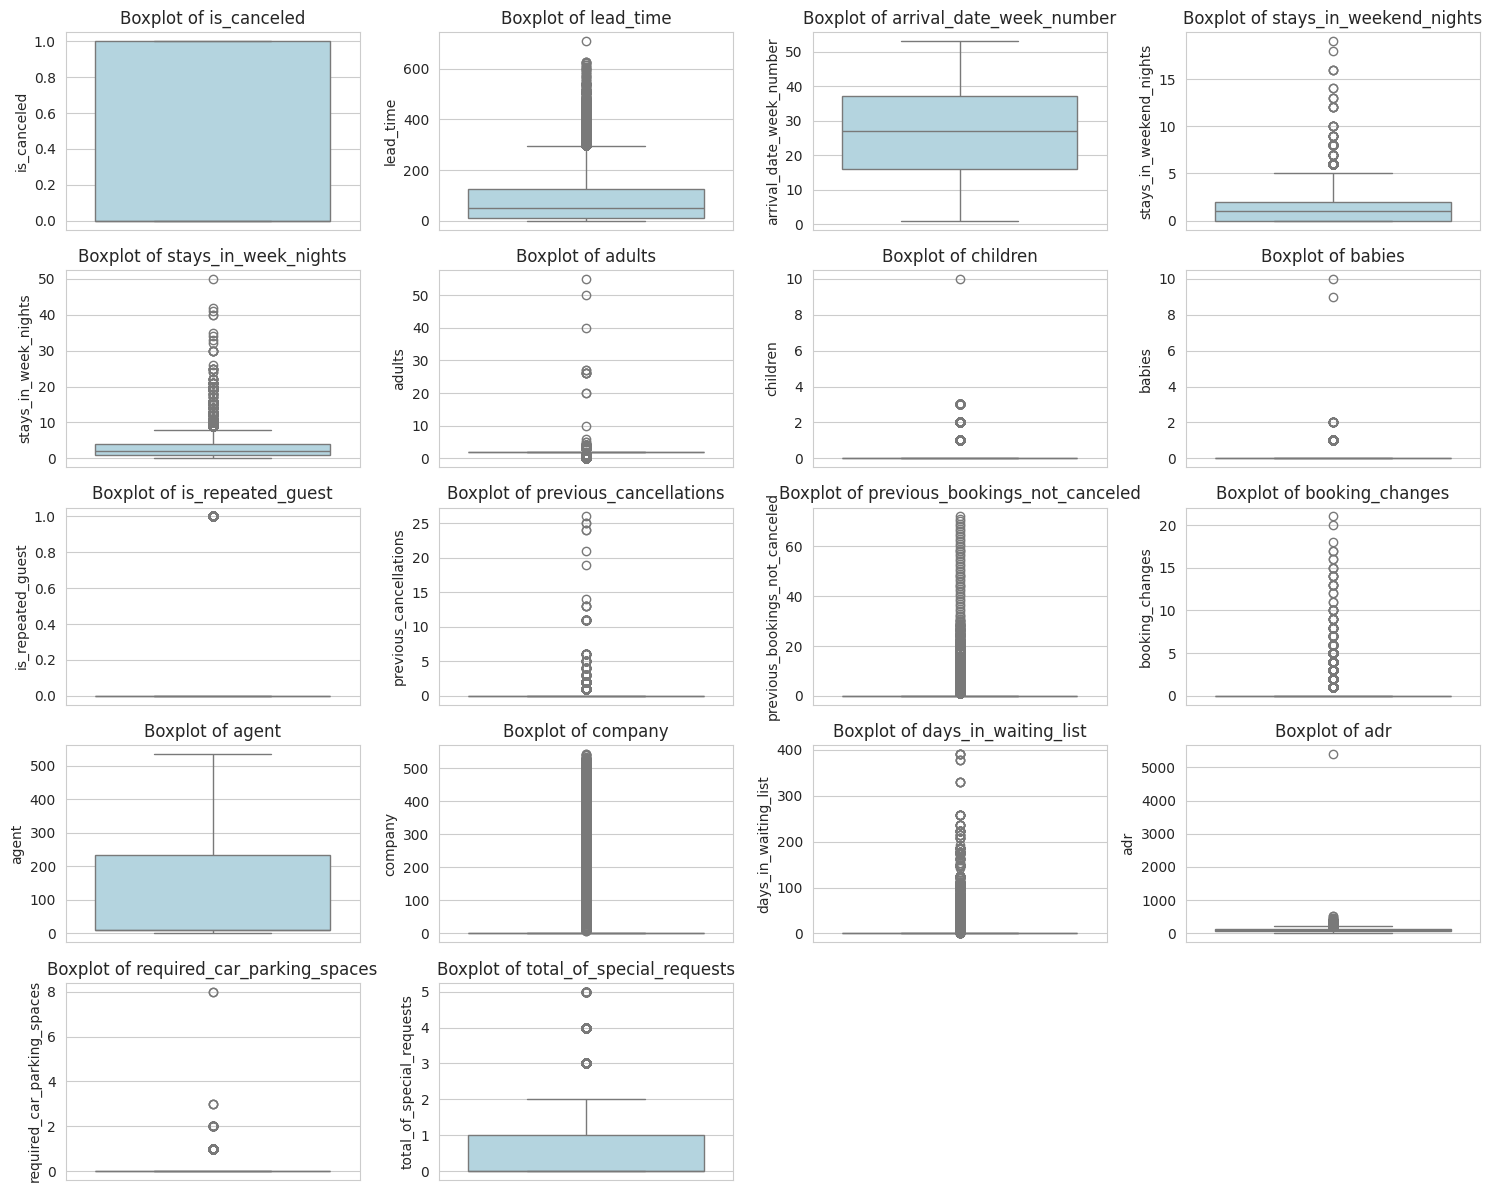

In [25]:
# Create boxplots to detect outliers in numerical columns
plt.figure(figsize=(15, 12))

# Calculate the number of rows and columns needed for the subplots
num_cols = len(numerical_cols)
num_rows = (num_cols + 3) // 4  # Calculate the number of rows, rounding up

# Iterate and plot the boxplots with the adjusted grid layout
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 4, i + 1)  # Adjusted grid layout
    sns.boxplot(df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [26]:
print("Shape after preprocessing (before capping):", df.shape)  # Before the capping code

Shape after preprocessing (before capping): (86726, 30)


In [27]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate Q1, Q3, and IQR for outlier detection
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

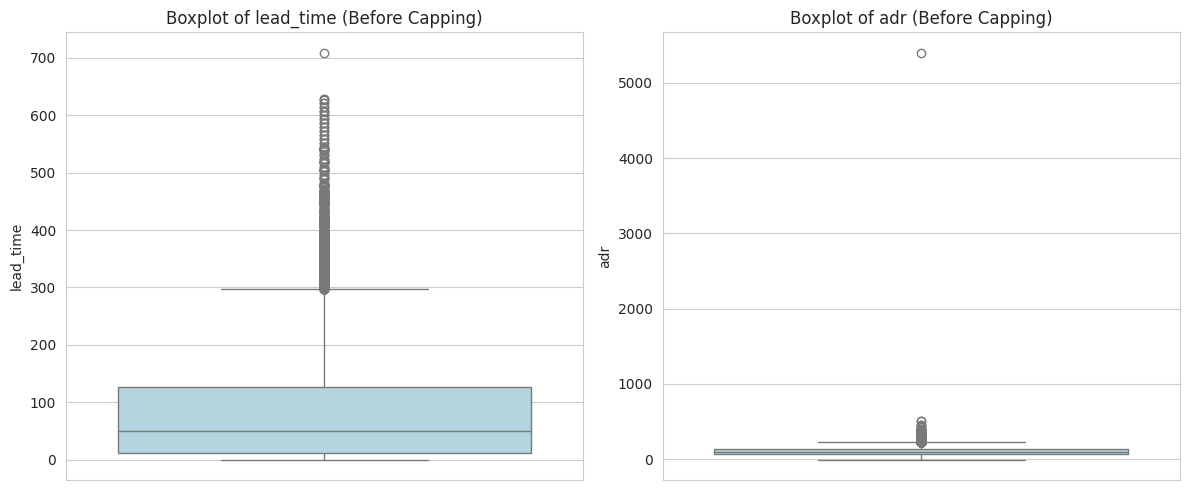

In [28]:
# Before capping: Visualize outliers for lead_time and adr
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(df['lead_time'], color='lightblue')
plt.title('Boxplot of lead_time (Before Capping)')

plt.subplot(1, 2, 2)
sns.boxplot(df['adr'], color='lightblue')
plt.title('Boxplot of adr (Before Capping)')
plt.tight_layout()
plt.show()

In [29]:
df['lead_time'] = df['lead_time'].clip(
    lower=df['lead_time'].quantile(0.05),
    upper=df['lead_time'].quantile(0.95)
)

# Cap adr at the 95th percentile (upper bound) and 5th percentile (lower bound)
df['adr'] = df['adr'].clip(
    lower=df['adr'].quantile(0.05),
    upper=df['adr'].quantile(0.95)
)
df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].clip(
    lower=lower_bound['stays_in_weekend_nights'],
    upper=upper_bound['stays_in_weekend_nights']
)

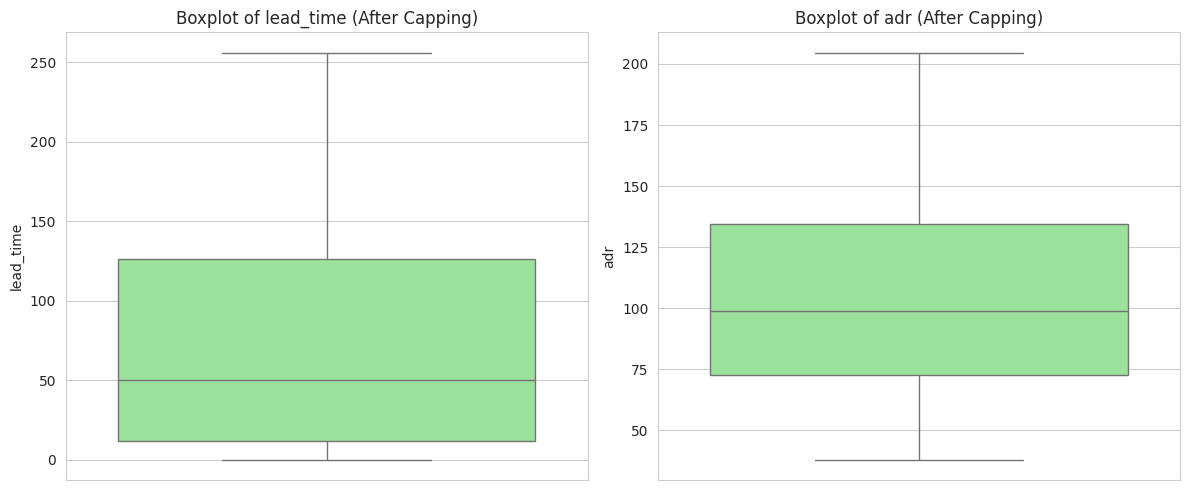

In [30]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(df['lead_time'], color='lightgreen')
plt.title('Boxplot of lead_time (After Capping)')

plt.subplot(1, 2, 2)
sns.boxplot(df['adr'], color='lightgreen')
plt.title('Boxplot of adr (After Capping)')
plt.tight_layout()
plt.show()

In [31]:
print(f"Shape of the dataset after capping outliers: {df.shape}")

Shape of the dataset after capping outliers: (86726, 30)


In [32]:
print("Original shape:", pd.read_csv("hotel_bookings.csv").shape)
print("Shape after capping:", df.shape)  # Should still be (86726, 30)

Original shape: (119390, 32)
Shape after capping: (86726, 30)


In [33]:
df.to_csv("cleaned_hotel_bookings.csv", index=False)

## Project- Second Part

This part progresses through six sections, each addressing a specific question:

1. ***When Do Guests Book?*** (Lead Time Distribution): Examines how far in advance guests book for Resort vs. City Hotels.
2.***How Long Do They Stay?*** (Stay Duration Patterns): Analyzes the average stay length by month and hotel type.
3. ***Who Are the Guests?*** (Booking Patterns by Market Segment): Explores the customer base through market segment distribution.
4. ***What Drives Revenue?*** (ADR and Stay Length): Investigates the relationship between stay length, ADR, and revenue.
5. ***Why Do Guests Cancel?*** (Cancellations by Lead Time and Hotel Type): Looks at how lead time impacts cancellation rates.
6. ***When Are Cancellations Most Likely?*** (Cancellation Trends by Month): Identifies seasonal trends in cancellation rates.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
os.chdir("/content/drive/MyDrive/ASDS/Data Visualization/Project")
df = pd.read_csv("cleaned_hotel_bookings.csv")

### When Do Guests Book? (Lead Time Distribution)

**Description:** This histogram shows the distribution of booking lead times for Resort (blue) and City (red) Hotels, with a marginal boxplot highlighting medians and capped outliers.

In [2]:
import plotly.express as px

fig = px.histogram(
    df,
    x="lead_time",
    color="hotel",
    nbins=50,
    title="Distribution of Booking Lead Time by Hotel Type",
    labels={"lead_time": "Lead Time (Days)", "hotel": "Hotel Type"},
    marginal="box",
    opacity=0.7
)
fig.update_layout(
    bargap=0.2,
    xaxis_title="Lead Time (Days)",
    yaxis_title="Number of Bookings",
    legend_title="Hotel Type"
)
fig.show()

**Insight:** Most bookings for both hotel types occur with lead times under 100 days, with a sharp peak at 0-10 days (likely last-minute bookings). Resort Hotels have a higher median lead time (~50 days) and a longer tail, with some bookings exceeding 150 days, compared to City Hotels (median ~30 days). The wider interquartile range (IQR) for Resort Hotels reflects greater variability in planning behavior, possibly due to vacations or special events.

**Recommendation:** Resort Hotels should offer early-bird discounts for bookings made 3+ months in advance to capture planners, while City Hotels can focus on last-minute marketing (e.g., flash sales) to attract spontaneous travelers.

### 2. How Long Do They Stay? (Stay Duration Patterns)

**Description:** This bar chart displays the average total stay length (weekend + weeknights) for Resort (red) and City (blue) Hotels across each month, ordered chronologically from January to December.

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame

df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

stay_by_month = df.groupby([df['arrival_date'].dt.strftime('%B'), 'hotel'])['total_stay'].mean().reset_index()
stay_by_month = stay_by_month.rename(columns={'arrival_date': 'Month'})

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

stay_by_month['Month'] = pd.Categorical(stay_by_month['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'Month' column
stay_by_month = stay_by_month.sort_values(by='Month')

fig2 = px.bar(
    stay_by_month,
    x="Month",
    y="total_stay",
    color="hotel",
    barmode="group",
    title="Average Stay Duration by Month and Hotel Type",
    labels={"total_stay": "Average Stay Length (Nights)", "hotel": "Hotel Type"}
)
fig2.update_layout(
    xaxis_title="Month",
    yaxis_title="Average Stay Length (Nights)",
    legend_title="Hotel Type"
)
fig2.show()

**Insight:** Resort Hotels consistently have longer average stays, peaking in summer months like August (appr. 5.5 nights) and July (appr. 5 nights), likely due to seasonal leisure travel. In contrast, City Hotels show shorter, more stable stays (~2.5 to 3.5 nights) throughout the year, with slight increases in spring (e.g., April: ~3.5 nights). This suggests Resort guests are vacationers seeking extended getaways, while City Hotel guests may include business travelers or short-term visitors.

**Recommendation:** Resort Hotels can capitalize on longer summer stays by offering extended-stay packages or family-oriented promotions during peak months like July and August. City Hotels should focus on optimizing room turnover with competitive pricing for shorter stays, especially targeting business travelers with amenities like fast check-in/out or coworking spaces.

### 3. Who Are the Guests? (Booking Patterns by Market Segment)

**Description:** This stacked bar chart shows the proportion of bookings by market segment for Resort and City Hotels, highlighting the distribution of customer types.

In [4]:
market_segment_dist = df.groupby(['hotel', 'market_segment']).size().reset_index(name='count')
market_segment_dist['proportion'] = market_segment_dist.groupby('hotel')['count'].transform(lambda x: x / x.sum())

fig3 = px.bar(
    market_segment_dist,
    x="proportion",
    y="hotel",
    color="market_segment",
    title="Proportion of Bookings by Market Segment and Hotel Type",
    labels={"proportion": "Proportion of Bookings", "hotel": "Hotel Type", "market_segment": "Market Segment"},
    orientation='h'
)
fig3.update_layout(
    xaxis_title="Proportion of Bookings",
    yaxis_title="Hotel Type",
    legend_title="Market Segment",
    barmode="stack"
)
fig3.show()

**Insight:** City Hotels are heavily reliant on the Online TA segment (60-70% of bookings), with smaller contributions from Corporate (10-15%), Direct (5-10%), and Offline TA/TO (5-10%) segments, indicating a customer base of tech-savvy, price-sensitive travelers booking through platforms like Booking.com or Expedia. In contrast, Resort Hotels have a more balanced distribution, with Online TA (40-50%) still the largest segment, but significant proportions from Offline TA/TO (20-25%), Groups (5-20%), and Direct (10-15%) segments. This suggests Resort Hotels cater to a diverse clientele, including leisure travelers, families, and organized groups often booking through traditional travel agencies or directly with the hotel.

**Recommendation:** City Hotels should optimize their presence on online booking platforms by ensuring competitive pricing, high-quality listings, and promotions to attract their primary customer base. Resort Hotels can target group travelers with tailored packages (e.g., group discounts, event spaces for family reunions or weddings) and strengthen relationships with offline travel agents to maintain their diverse booking channels.

### 4. What Drives Revenue? (ADR and Stay Length)

**Description:** This scatter plot shows the relationship between stay length and ADR, with point size reflecting revenue and color indicating hotel type. Hovering reveals booking date and cancellation status.

In [ ]:
# Calculate revenue per booking
df['revenue'] = df['adr'] * df['total_stay']

fig = px.scatter(
    df,
    x="total_stay",
    y="adr",
    color="hotel",
    size="revenue",
    hover_data=["arrival_date", "is_canceled"],
    title="ADR vs. Stay Length: Revenue Impact by Hotel Type",
    labels={"total_stay": "Total Stay (Nights)", "adr": "Average Daily Rate ($)", "hotel": "Hotel Type"}
)
fig.update_layout(
    xaxis_title="Total Stay (Nights)",
    yaxis_title="Average Daily Rate ($)",
    legend_title="Hotel Type"
)
fig.show()

**Insight:** Higher revenue (larger points) is generally associated with longer stays and higher ADRs, as seen in the upper-right region of the plot. City Hotels tend to have a wider range of ADRs but shorter stays (mostly under 10 nights), while Resort Hotels show a more dispersed pattern, with some bookings having longer stays (up to 50 nights) and higher ADRs (up to ~$200). High-revenue outliers, particularly for Resort Hotels, may represent luxury bookings or extended vacation stays.

**Recommendation:** Resort Hotels should target premium pricing for mid-length stays (e.g., 5-10 nights) to maximize revenue from vacationers, while City Hotels can focus on volume by offering competitive rates for shorter stays, appealing to business travelers and short-term visitors.

### 5. Why Do Guests Cancel? (Cancellations by Lead Time and Hotel Type)

**Description:** This boxplot compares the lead time distribution for bookings that were canceled (1) versus those that were not (0), split by hotel type (Resort in blue, City in red)

In [ ]:
fig = px.box(
    df,
    x="is_canceled",
    y="lead_time",
    color="hotel",
    title="Lead Time Distribution by Cancellation Status and Hotel Type",
    labels={"is_canceled": "Canceled (0 = No, 1 = Yes)", "lead_time": "Lead Time (Days)", "hotel": "Hotel Type"},
    category_orders={"is_canceled": [0, 1]}
)
fig.update_layout(
    xaxis_title="Cancellation Status",
    yaxis_title="Lead Time (Days)",
    legend_title="Hotel Type"
)
fig.show()

**Insight:** Canceled bookings have significantly higher lead times for both hotel types. For Resort Hotels, the median lead time for canceled bookings is ~120 days (vs. ~50 days for non-canceled), and for City Hotels, it’s ~100 days (vs. ~30 days for non-canceled). This suggests that bookings made far in advance are more likely to be canceled, possibly due to changes in plans or greater uncertainty over longer timeframes. The effect is more pronounced for Resort Hotels, where the difference in lead time between canceled and non-canceled bookings is larger.

**Recommendation:** To mitigate cancellation risks, hotels can implement stricter cancellation policies for bookings with long lead times (e.g., non-refundable rates or higher cancellation fees for bookings made 90+ days in advance). Alternatively, offering incentives like discounted rates for non-refundable bookings or flexible rebooking options could encourage guests to commit to their plans, especially for Resort Hotels where the cancellation risk is higher.

### 6. When Are Cancellations Most Likely? (Cancellation Trends by Month)

**Description:** This line chart displays the cancellation rate (proportion of bookings canceled) by month for Resort and City Hotels, with months ordered chronologically.

In [6]:
# Convert the 'arrival_date' column to datetime if it's not already
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

cancel_by_month = df.groupby([df['arrival_date'].dt.strftime('%B'), 'hotel'])['is_canceled'].mean().reset_index()
cancel_by_month = cancel_by_month.rename(columns={'arrival_date': 'Month', 'is_canceled': 'Cancellation Rate'})
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
cancel_by_month['Month'] = pd.Categorical(cancel_by_month['Month'], categories=month_order, ordered=True)
cancel_by_month = cancel_by_month.sort_values('Month')

fig6 = px.line(
    cancel_by_month,
    x="Month",
    y="Cancellation Rate",
    color="hotel",
    title="Cancellation Rate by Month and Hotel Type",
    labels={"Cancellation Rate": "Cancellation Rate", "hotel": "Hotel Type"}
)
fig6.update_layout(
    xaxis_title="Month",
    yaxis_title="Cancellation Rate",
    legend_title="Hotel Type"
)
fig6.show()

**Insight:** City Hotels exhibit higher cancellation rates throughout the year, peaking in April (~ 35%), likely due to uncertainties in business travel, as they cater to a higher proportion of corporate clients. Rates remain elevated (mostly above 25%) but dip to a low in November (~ 22%). In contrast, Resort Hotels show a peak in April (~ 25%) but a significant drop in August (~ 15%), aligning with their peak stay duration in summer, suggesting that guests are more committed to summer vacation plans. Resort cancellation rates are generally lower, especially in late summer and fall, reflecting the planned nature of leisure travel.

**Recommendation:** City Hotels should target spring travelers (e.g., April) with incentives like loyalty points or flexible cancellation policies to reduce cancellations during high-risk periods, especially for corporate clients. Resort Hotels should overbook cautiously in spring (e.g., April) but can be more confident in summer (e.g., August) due to lower cancellation rates, potentially offering last-minute deals to fill any remaining rooms.

**Summary of Recommendations:**

| **Hotel Type** | **Strategy**                          | **Focus Area**               |
|---------------|---------------------------------------|-----------------------------|
| Resort Hotel  | Early-bird discounts                 | Long lead-time bookings     |
| Resort Hotel  | Extended-stay packages               | Summer months (July, August)|
| Resort Hotel  | Group packages                       | Groups market segment       |
| Resort Hotel  | Premium pricing                      | Mid-length stays (5-10 nights) |
| Resort Hotel  | Stricter cancellation policies       | Long lead times, spring     |
| Resort Hotel  | Last-minute deals                    | Summer (low cancellation risk) |
| City Hotel    | Last-minute marketing (flash sales)  | Short lead-time bookings    |
| City Hotel    | Optimize room turnover               | Short stays year-round      |
| City Hotel    | Optimize online booking platforms    | Online TA segment           |
| City Hotel    | Corporate amenities                  | Corporate segment           |
| City Hotel    | Competitive pricing                  | Short stays                 |
| City Hotel    | Incentives (e.g., loyalty points)    | Spring (high cancellation risk) |